In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import vectorize
%matplotlib inline

In [71]:
def draw(dist_fun):
    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
    
    c0, c1 = np.array([20, 30]), np.array([70, 80])
    
    predicted = predict(np.c_[xx.ravel(), yy.ravel()], c0, c1, dist_fun).reshape(xx.shape)
    plt.pcolormesh(xx, yy, predicted, cmap='autumn')
    plt.scatter([c0[0], c1[0]], [c0[1], c1[1]], c=[0, 1], s=100, 
                cmap='autumn', edgecolors='black', linewidth=1.5);

In [51]:
def predict(coords, c0, c1, dist_fun):
    res = np.array([-1] * len(coords))
    for i in range(len(coords)):
        res[i] = int(dist_fun(coords[i, :], c0) > dist_fun(coords[i, :], c1))
    return res

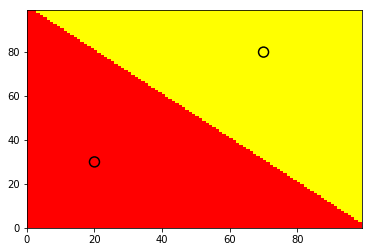

In [72]:
euclid = lambda u, v: np.sum(np.abs(u - v) ** 2) ** (1 / 2)
draw(euclid)

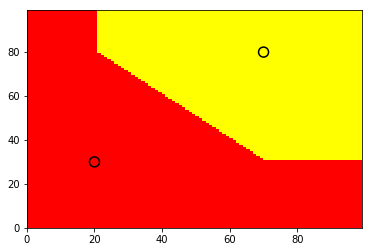

In [73]:
manhattan = lambda u, v: np.sum(np.abs(u - v))
draw(manhattan)

In [74]:
manhattan(np.array([10, 20]), np.array([90, 20])), manhattan(np.array([80, 90]), np.array([90, 20]))

(80, 80)

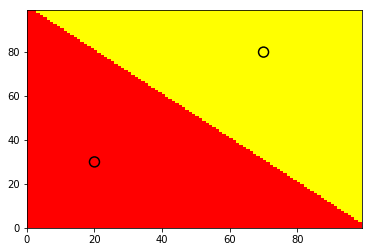

In [75]:
max_ = lambda u, v: np.max(np.abs(u - v))
draw(max_)

In [76]:
c0, c1 = np.array([10, 20]), np.array([80, 90])
predict(np.array([[99, 99]]), c0, c1, max_)

array([1])

In [77]:
max_(np.array([10, 20]), np.array([99, 99]))

89

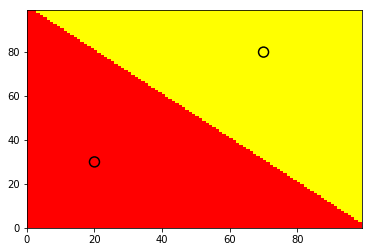

In [78]:
min_ = lambda u, v: np.min(np.abs(u - v))
draw(max_)

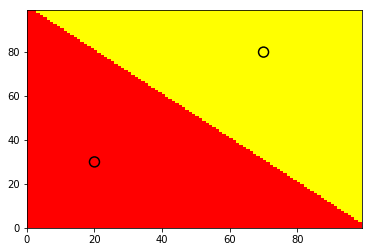

In [79]:
euclid3 = lambda u, v: np.sum(np.abs(u - v) ** 3) ** (1 / 3)
draw(euclid3)